In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
df_cleaned = pd.read_csv('cleaned_dataset.csv')

In [4]:
df_cleaned['churn'].value_counts()

churn
1    40050
0    31843
Name: count, dtype: int64

<Axes: xlabel='churn', ylabel='count'>

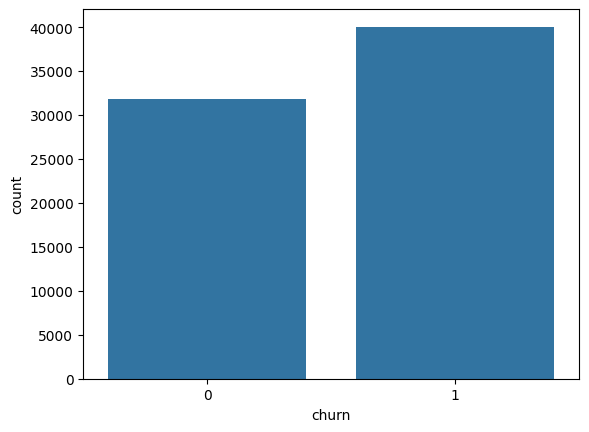

In [5]:
sns.countplot(data=df_cleaned,x='churn')

<Axes: title={'center': 'is_movie_package_subscriber'}, ylabel='Frequency'>

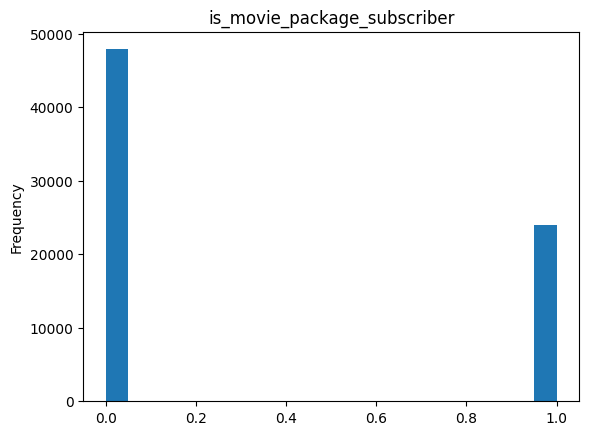

In [6]:
df_cleaned['is_movie_package_subscriber'].plot(kind='hist', bins=20, title='is_movie_package_subscriber')

<Axes: title={'center': 'is_tv_subscriber'}, ylabel='Frequency'>

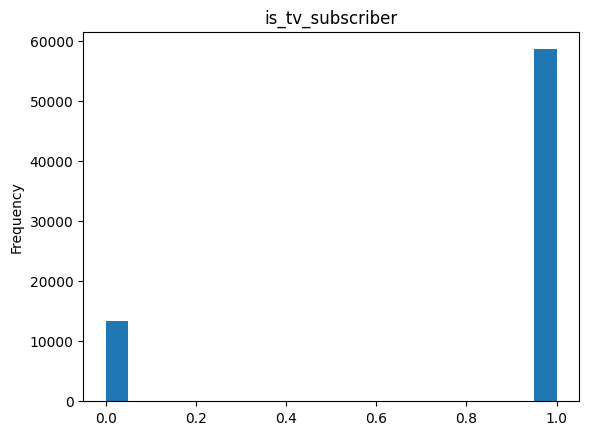

In [7]:
df_cleaned['is_tv_subscriber'].plot(kind='hist', bins=20, title='is_tv_subscriber')

In [8]:
subs = df_cleaned[["is_tv_subscriber", "is_movie_package_subscriber"]].sum()

subs

is_tv_subscriber               58609
is_movie_package_subscriber    24017
dtype: int64

<Axes: >

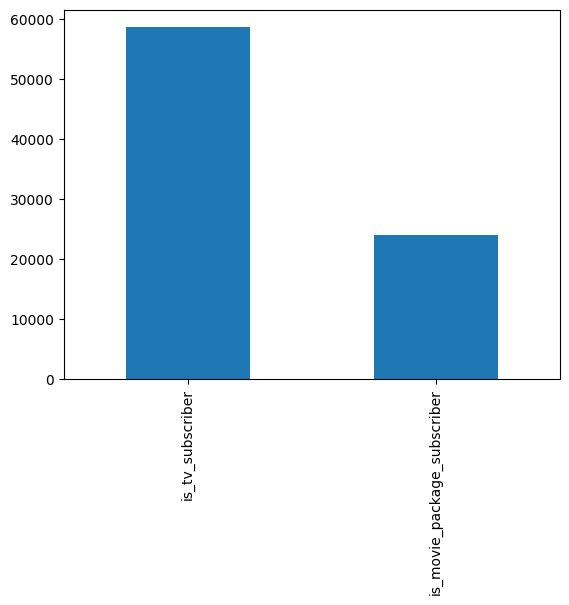

In [9]:
subs.plot.bar()

In [10]:
grouped = df_cleaned.groupby('is_tv_subscriber')['is_movie_package_subscriber'].value_counts()

grouped

is_tv_subscriber  is_movie_package_subscriber
0                 0                              13282
                  1                                  2
1                 0                              34594
                  1                              24015
Name: count, dtype: int64

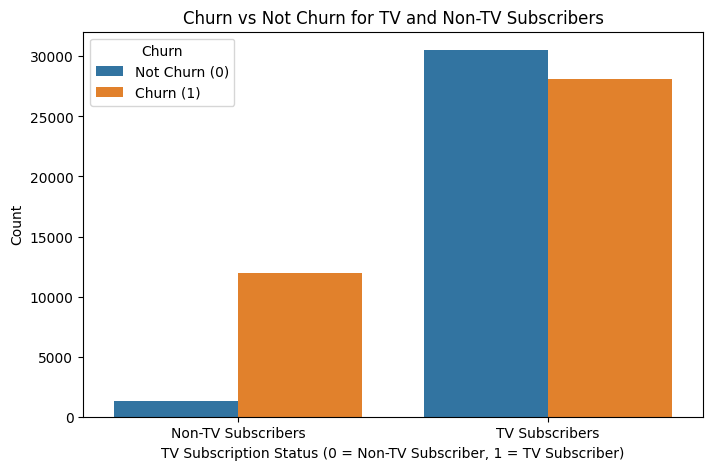

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x="is_tv_subscriber", hue="churn")
plt.title("Churn vs Not Churn for TV and Non-TV Subscribers")
plt.xlabel("TV Subscription Status (0 = Non-TV Subscriber, 1 = TV Subscriber)")
plt.ylabel("Count")
plt.xticks([0, 1], ["Non-TV Subscribers", "TV Subscribers"])
plt.legend(title="Churn", labels=["Not Churn (0)", "Churn (1)"])
plt.show()

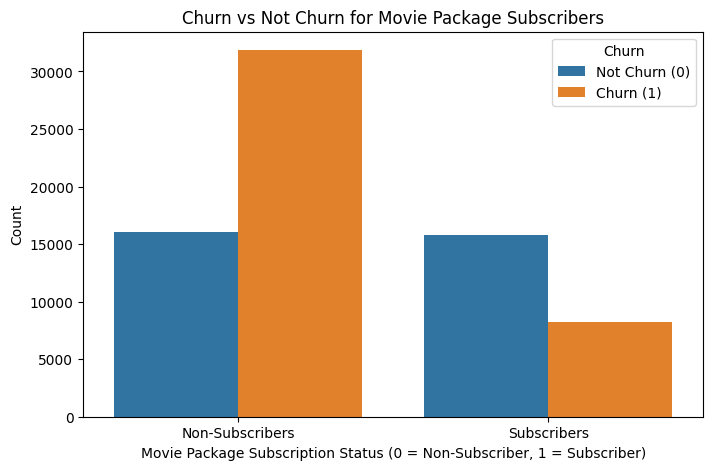

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x="is_movie_package_subscriber", hue="churn")
plt.title("Churn vs Not Churn for Movie Package Subscribers")
plt.xlabel("Movie Package Subscription Status (0 = Non-Subscriber, 1 = Subscriber)")
plt.ylabel("Count")
plt.xticks([0, 1], ["Non-Subscribers", "Subscribers"])
plt.legend(title="Churn", labels=["Not Churn (0)", "Churn (1)"])
plt.show()

In [13]:
both = ((df_cleaned['is_tv_subscriber'] == 1) & (df_cleaned['is_movie_package_subscriber'] == 1)).sum()
tv_only = ((df_cleaned['is_tv_subscriber'] == 1) & (df_cleaned['is_movie_package_subscriber'] == 0)).sum()
movie_only = ((df_cleaned['is_tv_subscriber'] == 0) & (df_cleaned['is_movie_package_subscriber'] == 1)).sum()
neither = ((df_cleaned['is_tv_subscriber'] == 0) & (df_cleaned['is_movie_package_subscriber'] == 0)).sum()

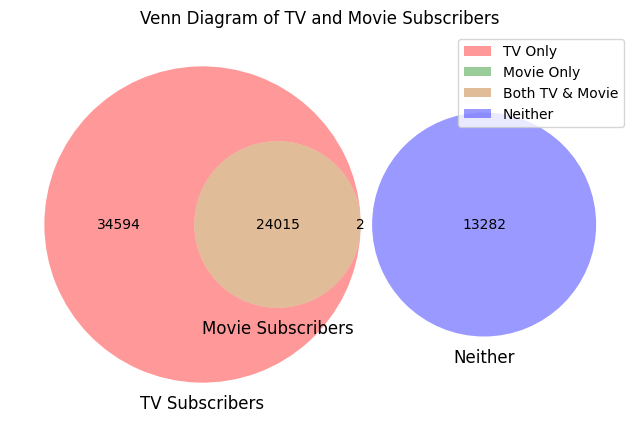

In [14]:
plt.figure(figsize=(10, 5))
venn = venn3(subsets=(tv_only, movie_only, neither, both, 0, 0, 0), set_labels=('TV Subscribers', 'Movie Subscribers', 'Neither'))
venn.get_label_by_id('100').set_text(tv_only)
venn.get_label_by_id('010').set_text(movie_only)
venn.get_label_by_id('110').set_text(both)
venn.get_label_by_id('001').set_text(neither)
plt.legend(['TV Only', 'Movie Only', 'Both TV & Movie', 'Neither'], loc='upper right')
plt.title("Venn Diagram of TV and Movie Subscribers")
plt.show()

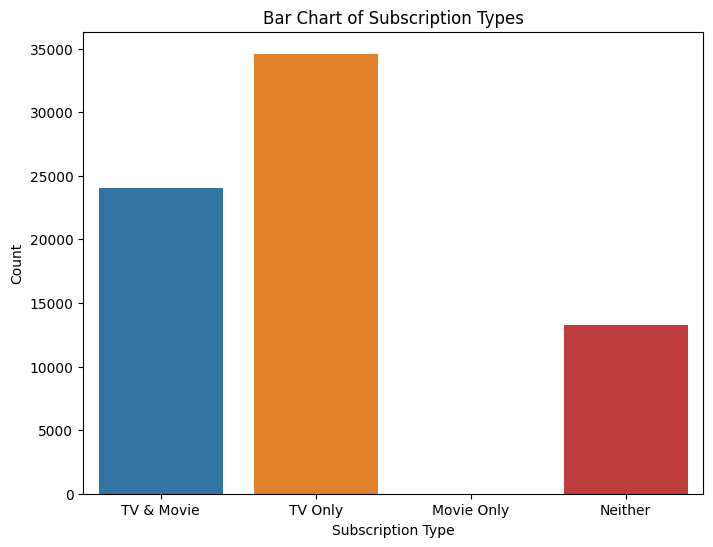

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['TV & Movie', 'TV Only', 'Movie Only', 'Neither'], y=[both, tv_only, movie_only, neither], hue=['TV & Movie', 'TV Only', 'Movie Only', 'Neither'])
plt.xlabel("Subscription Type")
plt.ylabel("Count")
plt.title("Bar Chart of Subscription Types")
plt.show()

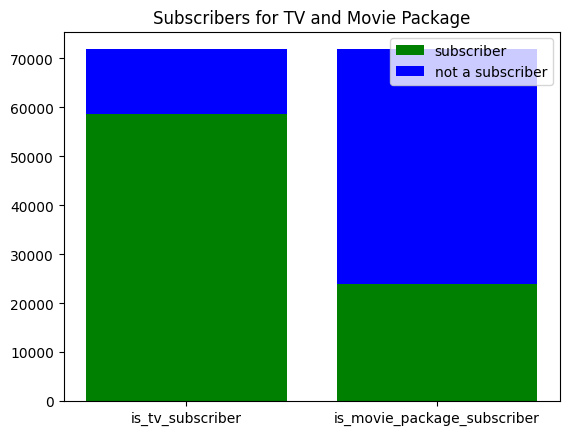

In [16]:
x = ["is_tv_subscriber", "is_movie_package_subscriber"]
y1 = [df_cleaned[df_cleaned["is_tv_subscriber"]==1].shape[0],
      df_cleaned[df_cleaned["is_movie_package_subscriber"]==1].shape[0]]
y2 = [df_cleaned[df_cleaned["is_tv_subscriber"]==0].shape[0],
      df_cleaned[df_cleaned["is_movie_package_subscriber"]==0].shape[0]]

plt.bar(x, y1, color='g')
plt.bar(x, y2, bottom=y1, color='b')
plt.legend(["subscriber", "not a subscriber"])
plt.title("Subscribers for TV and Movie Package")
plt.show()

<Axes: title={'center': 'subscription_age'}, ylabel='Frequency'>

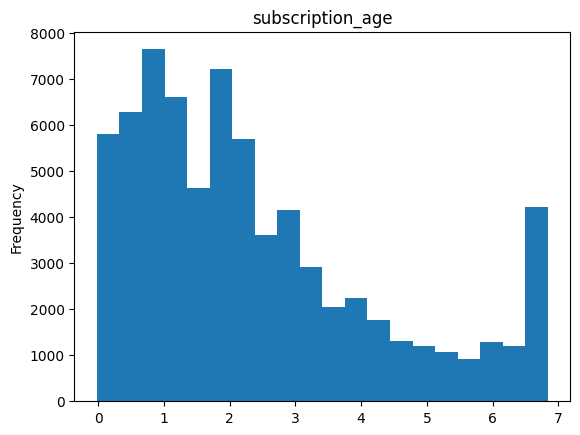

In [17]:
df_cleaned['subscription_age'].plot(kind='hist', bins=20, title='subscription_age')

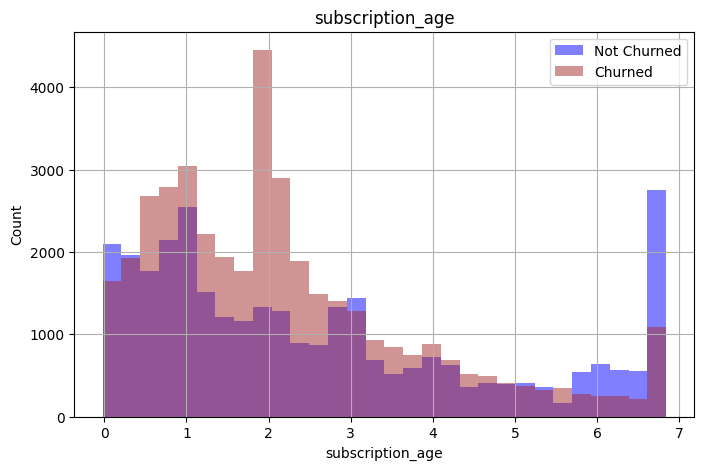

In [18]:
numerical_features = ["subscription_age"]
bin_edges_age = np.histogram_bin_edges(df_cleaned["subscription_age"], bins=30)
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    plt.hist(df_cleaned[df_cleaned['churn'] == 0][feature], bins=bin_edges_age, color='blue', label='Not Churned', alpha=0.5)
    plt.hist(df_cleaned[df_cleaned['churn'] == 1][feature], bins=bin_edges_age, color='brown', label='Churned', alpha=0.5)
    plt.legend()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

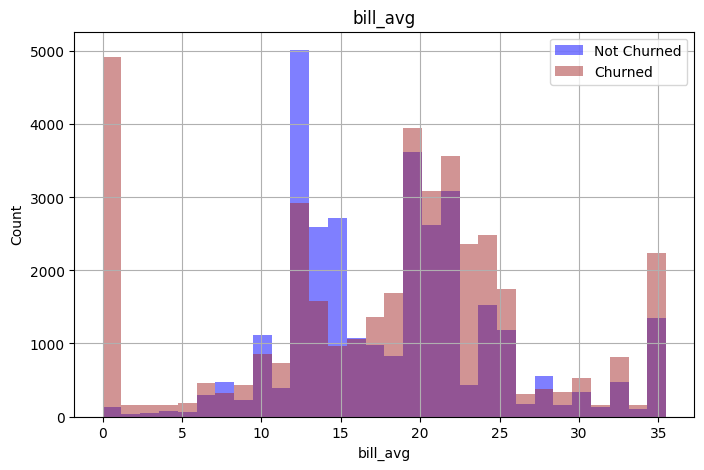

In [19]:
numerical_features = ["bill_avg"]
bin_edges_bill = np.histogram_bin_edges(df_cleaned["bill_avg"], bins=30)
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    plt.hist(df_cleaned[df_cleaned['churn'] == 0][feature], bins=bin_edges_bill, color='blue', label='Not Churned', alpha=0.5)
    plt.hist(df_cleaned[df_cleaned['churn'] == 1][feature], bins=bin_edges_bill, color='brown', label='Churned', alpha=0.5)
    plt.legend()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

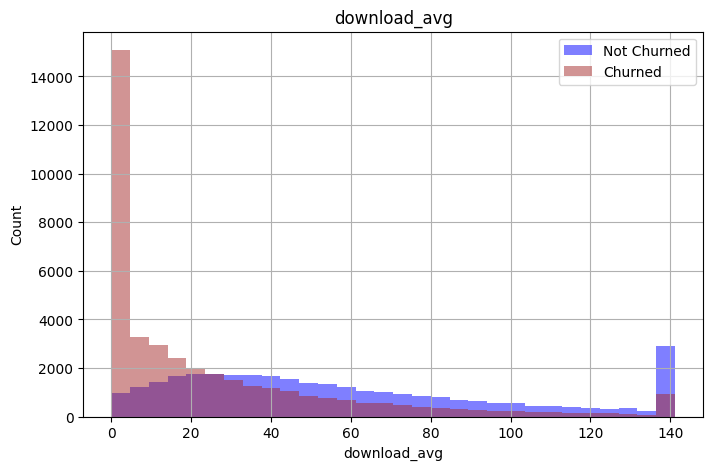

In [20]:
numerical_features = ["download_avg"]
bin_edges_download = np.histogram_bin_edges(df_cleaned["download_avg"], bins=30)
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    plt.hist(df_cleaned[df_cleaned['churn'] == 0][feature], bins=bin_edges_download, color='blue', label='Not Churned', alpha=0.5)
    plt.hist(df_cleaned[df_cleaned['churn'] == 1][feature], bins=bin_edges_download, color='brown', label='Churned', alpha=0.5)
    plt.legend()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

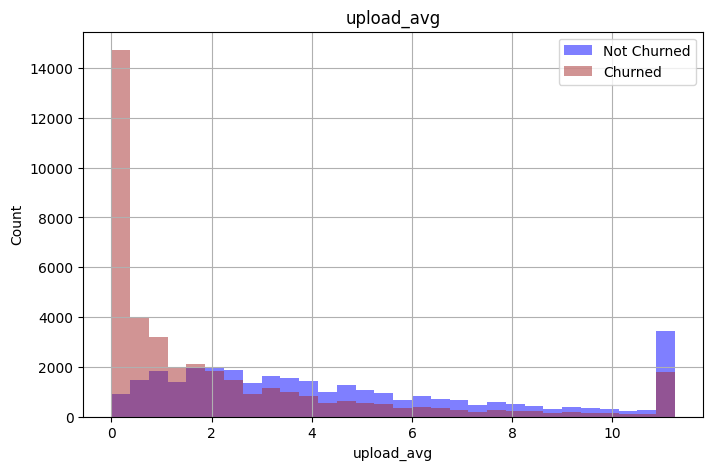

In [21]:
numerical_features = ["upload_avg"]
bin_edges_upload = np.histogram_bin_edges(df_cleaned["upload_avg"], bins=30)
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    plt.hist(df_cleaned[df_cleaned['churn'] == 0][feature], bins=bin_edges_upload, color='blue', label='Not Churned', alpha=0.5)
    plt.hist(df_cleaned[df_cleaned['churn'] == 1][feature], bins=bin_edges_upload, color='brown', label='Churned', alpha=0.5)
    plt.legend()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

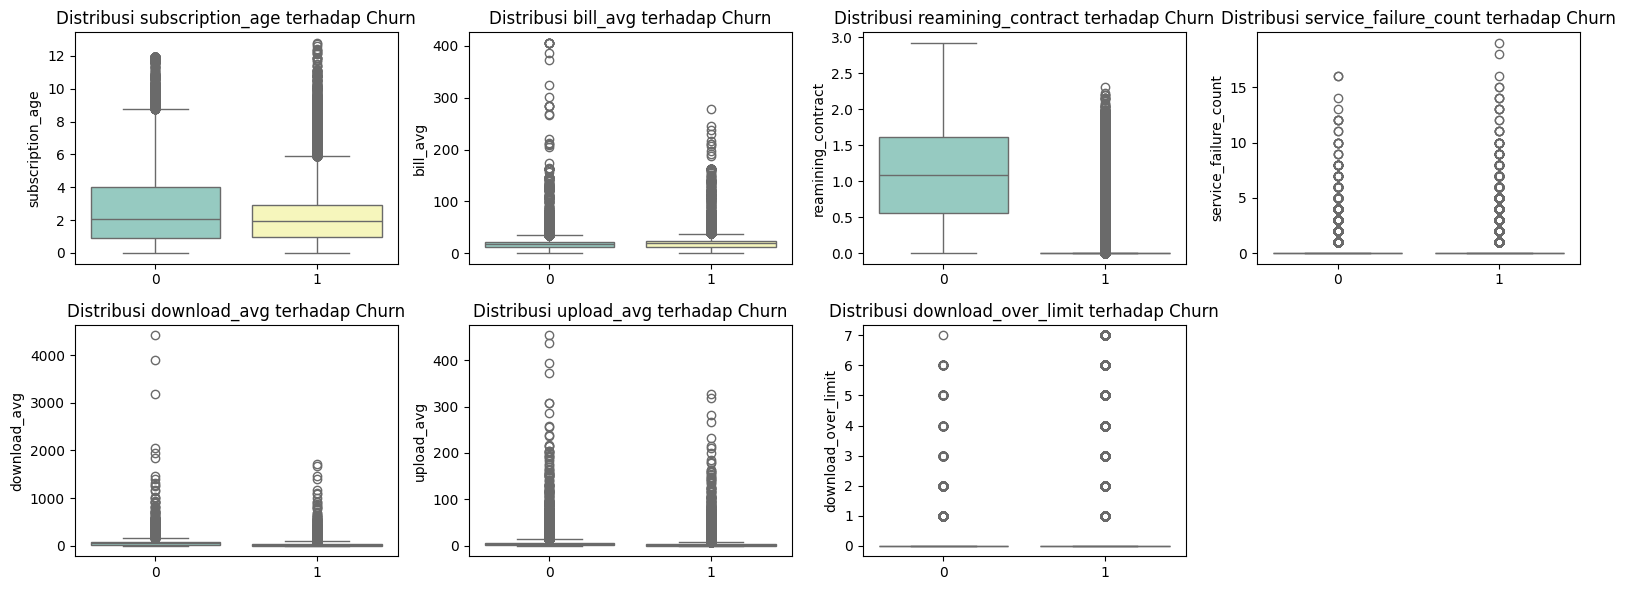

In [22]:
df = pd.read_csv('internet_service_churn.csv')

numeric_features = [
    'subscription_age', 'bill_avg', 'reamining_contract',
    'service_failure_count', 'download_avg', 'upload_avg', 'download_over_limit'
]

plt.figure(figsize=(16, 6))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='churn', y=feature, data=df, palette='Set3')
    plt.title(f'Distribusi {feature} terhadap Churn')
    plt.xlabel('')
plt.tight_layout()
plt.show()

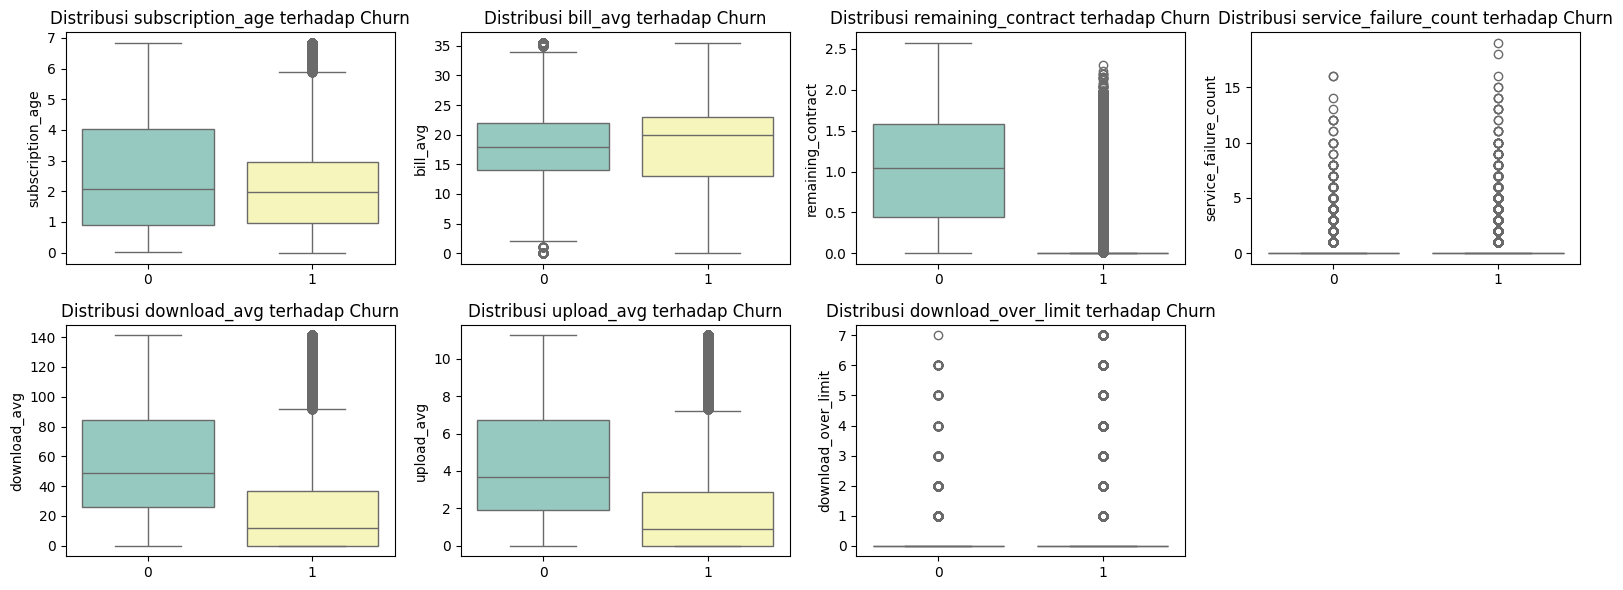

In [23]:
numeric_features = [
    'subscription_age', 'bill_avg', 'remaining_contract',
    'service_failure_count', 'download_avg', 'upload_avg', 'download_over_limit'
]

plt.figure(figsize=(16, 6))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='churn', y=feature, data=df_cleaned, palette='Set3')
    plt.title(f'Distribusi {feature} terhadap Churn')
    plt.xlabel('')
plt.tight_layout()
plt.show()

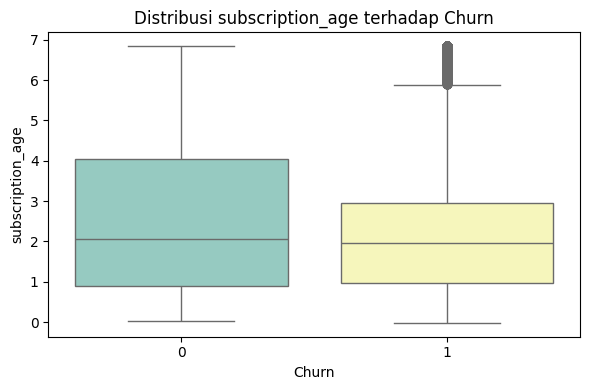

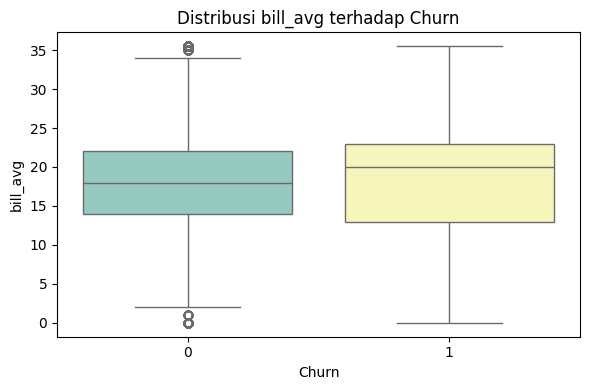

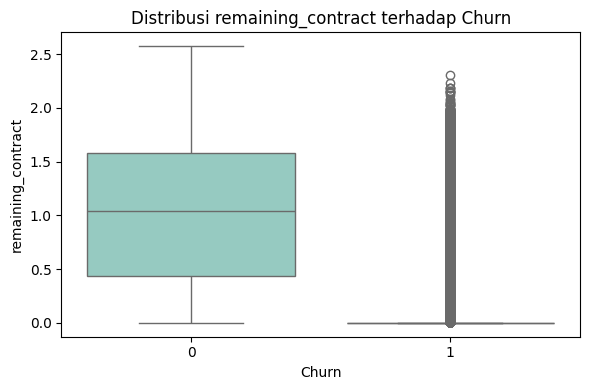

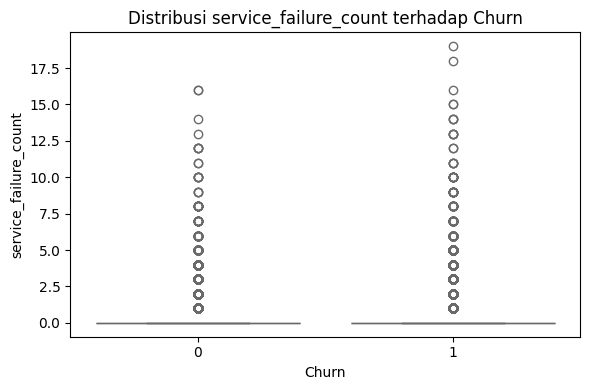

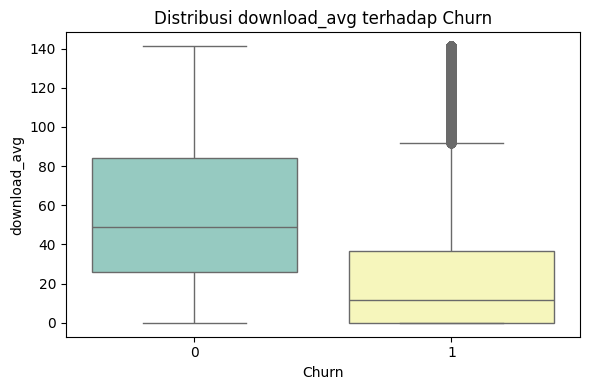

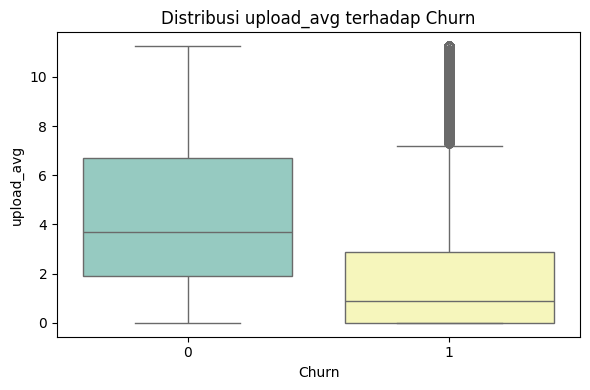

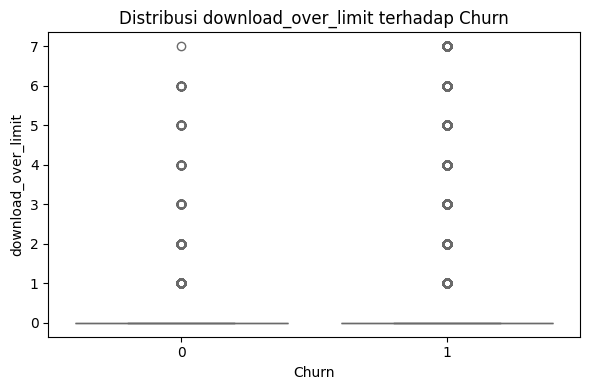

In [24]:
numeric_features = [
    'subscription_age', 'bill_avg', 'remaining_contract',
    'service_failure_count', 'download_avg', 'upload_avg', 'download_over_limit'
]

for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='churn', y=feature, data=df_cleaned, palette='Set3')
    plt.title(f'Distribusi {feature} terhadap Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

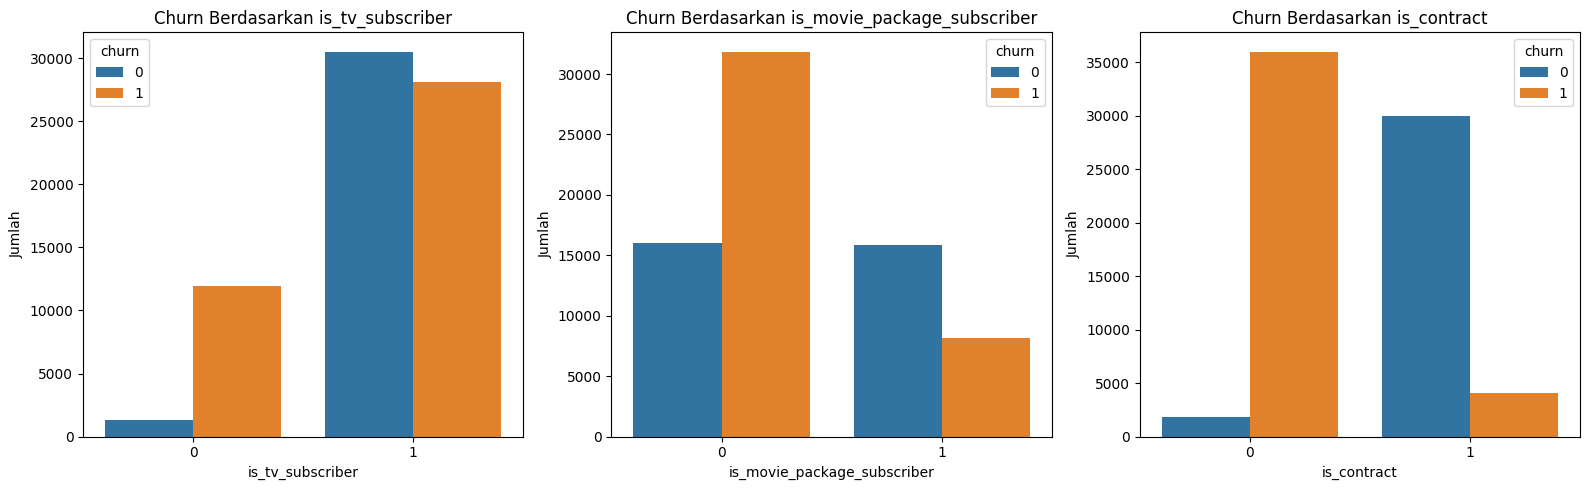

In [25]:
categorical_features = [
    'is_tv_subscriber', 'is_movie_package_subscriber',
    'is_contract'
]

plt.figure(figsize=(16, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=feature, hue='churn', data=df_cleaned)
    plt.title(f'Churn Berdasarkan {feature}')
    plt.xlabel(feature)
    plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

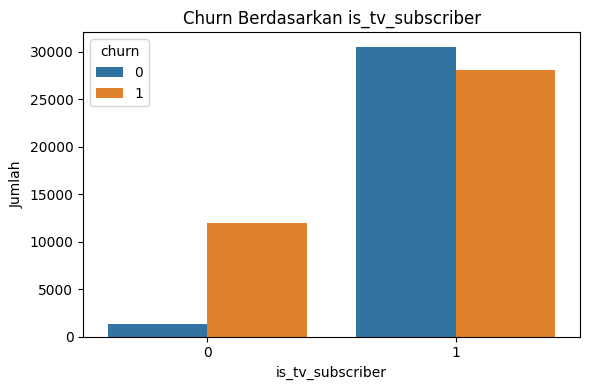

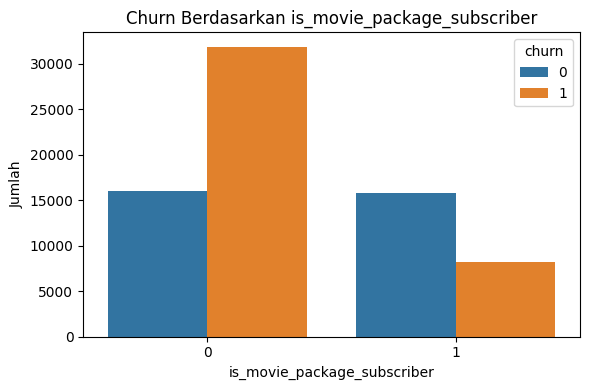

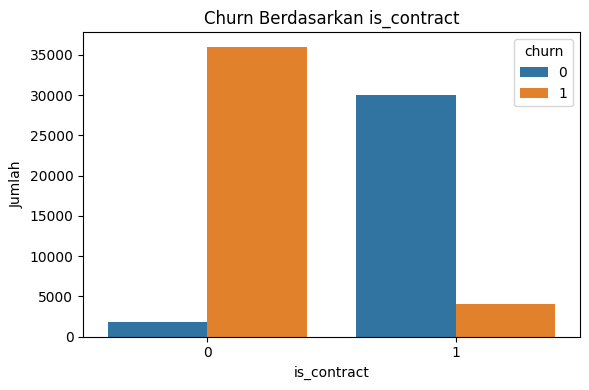

In [26]:
categorical_features = [
    'is_tv_subscriber', 'is_movie_package_subscriber',
    'is_contract'
]

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='churn', data=df_cleaned)
    plt.title(f'Churn Berdasarkan {feature}')
    plt.xlabel(feature)
    plt.ylabel('Jumlah')
    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'Correlation Matrix of Features')

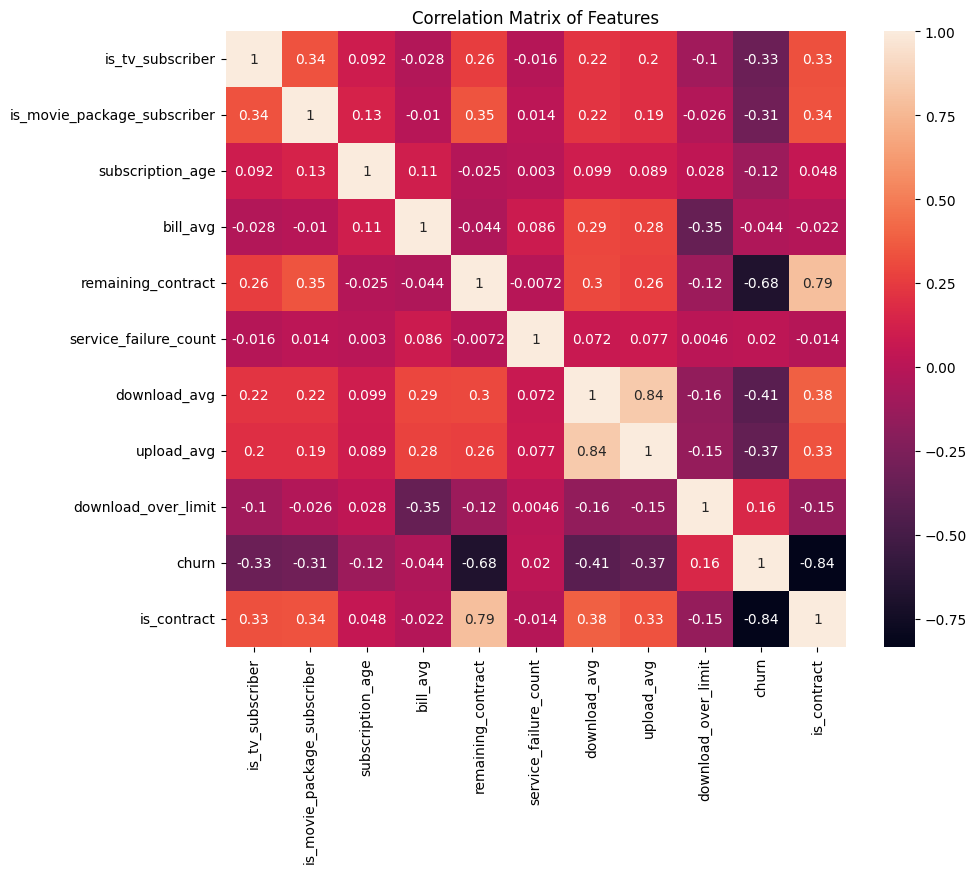

In [27]:
plt.figure(figsize=(10, 8))
cor=df_cleaned.corr()
sns.heatmap(cor,annot=True)
plt.title('Correlation Matrix of Features')

In [28]:
correlation_matrix = df_cleaned.corr().round(2)
correlation_matrix

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,is_contract
is_tv_subscriber,1.00,0.34,0.09,-0.03,0.26,-0.02,0.22,0.20,-0.10,-0.33,0.33
is_movie_package_subscriber,0.34,1.00,0.13,-0.01,0.35,0.01,0.22,0.19,-0.03,-0.31,0.34
subscription_age,0.09,0.13,1.00,0.11,-0.02,0.00,0.10,0.09,0.03,-0.12,0.05
bill_avg,-0.03,-0.01,0.11,1.00,-0.04,0.09,0.29,0.28,-0.35,-0.04,-0.02
remaining_contract,0.26,0.35,-0.02,-0.04,1.00,-0.01,0.30,0.26,-0.12,-0.68,0.79
service_failure_count,-0.02,0.01,0.00,0.09,-0.01,1.00,0.07,0.08,0.00,0.02,-0.01
download_avg,0.22,0.22,0.10,0.29,0.30,0.07,1.00,0.84,-0.16,-0.41,0.38
upload_avg,0.20,0.19,0.09,0.28,0.26,0.08,0.84,1.00,-0.15,-0.37,0.33
download_over_limit,-0.10,-0.03,0.03,-0.35,-0.12,0.00,-0.16,-0.15,1.00,0.16,-0.15
churn,-0.33,-0.31,-0.12,-0.04,-0.68,0.02,-0.41,-0.37,0.16,1.00,-0.84


In [29]:
correlation_matrix.to_excel('correlation_matrix.xlsx', index=False)

| Nilai Korelasi   | Makna                                                  |
| ---------------- | ------------------------------------------------------ |
| **1**            | Korelasi positif sempurna (jika A naik, B pasti naik)  |
| **0.5 - 0.99**   | Korelasi positif kuat                                  |
| **0**            | Tidak ada korelasi linear                              |
| **-0.5 - -0.99** | Korelasi negatif kuat                                  |
| **-1**           | Korelasi negatif sempurna (jika A naik, B pasti turun) |

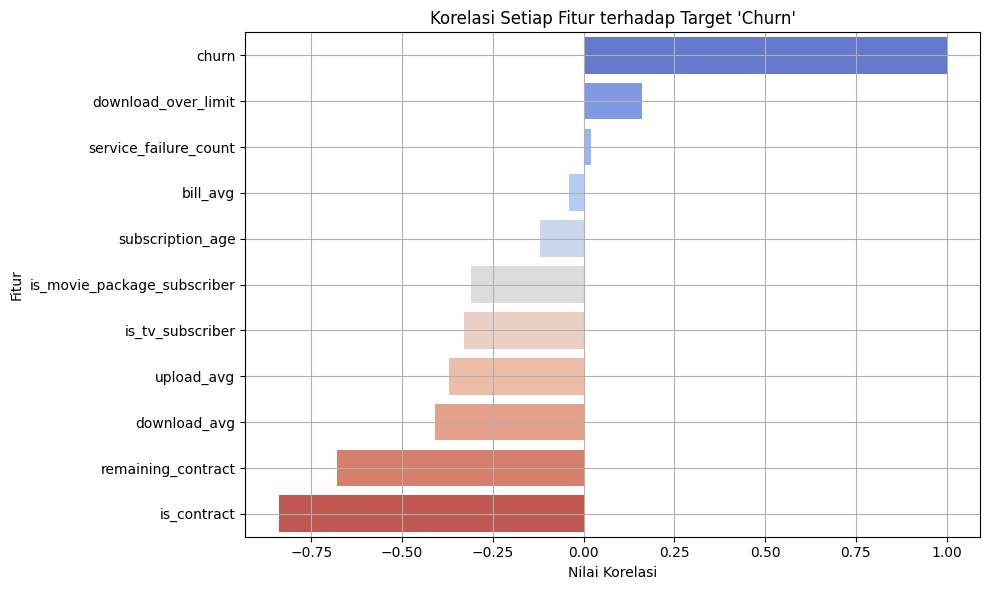

In [30]:
churn_correlation = correlation_matrix['churn'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=churn_correlation.values, y=churn_correlation.index, palette='coolwarm')
plt.title("Korelasi Setiap Fitur terhadap Target 'Churn'")
plt.xlabel("Nilai Korelasi")
plt.ylabel("Fitur")
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
df_cleaned[['is_contract', 'remaining_contract']].corr()

,is_contract,remaining_contract
is_contract,1.000000,0.788902
remaining_contract,0.788902,1.000000


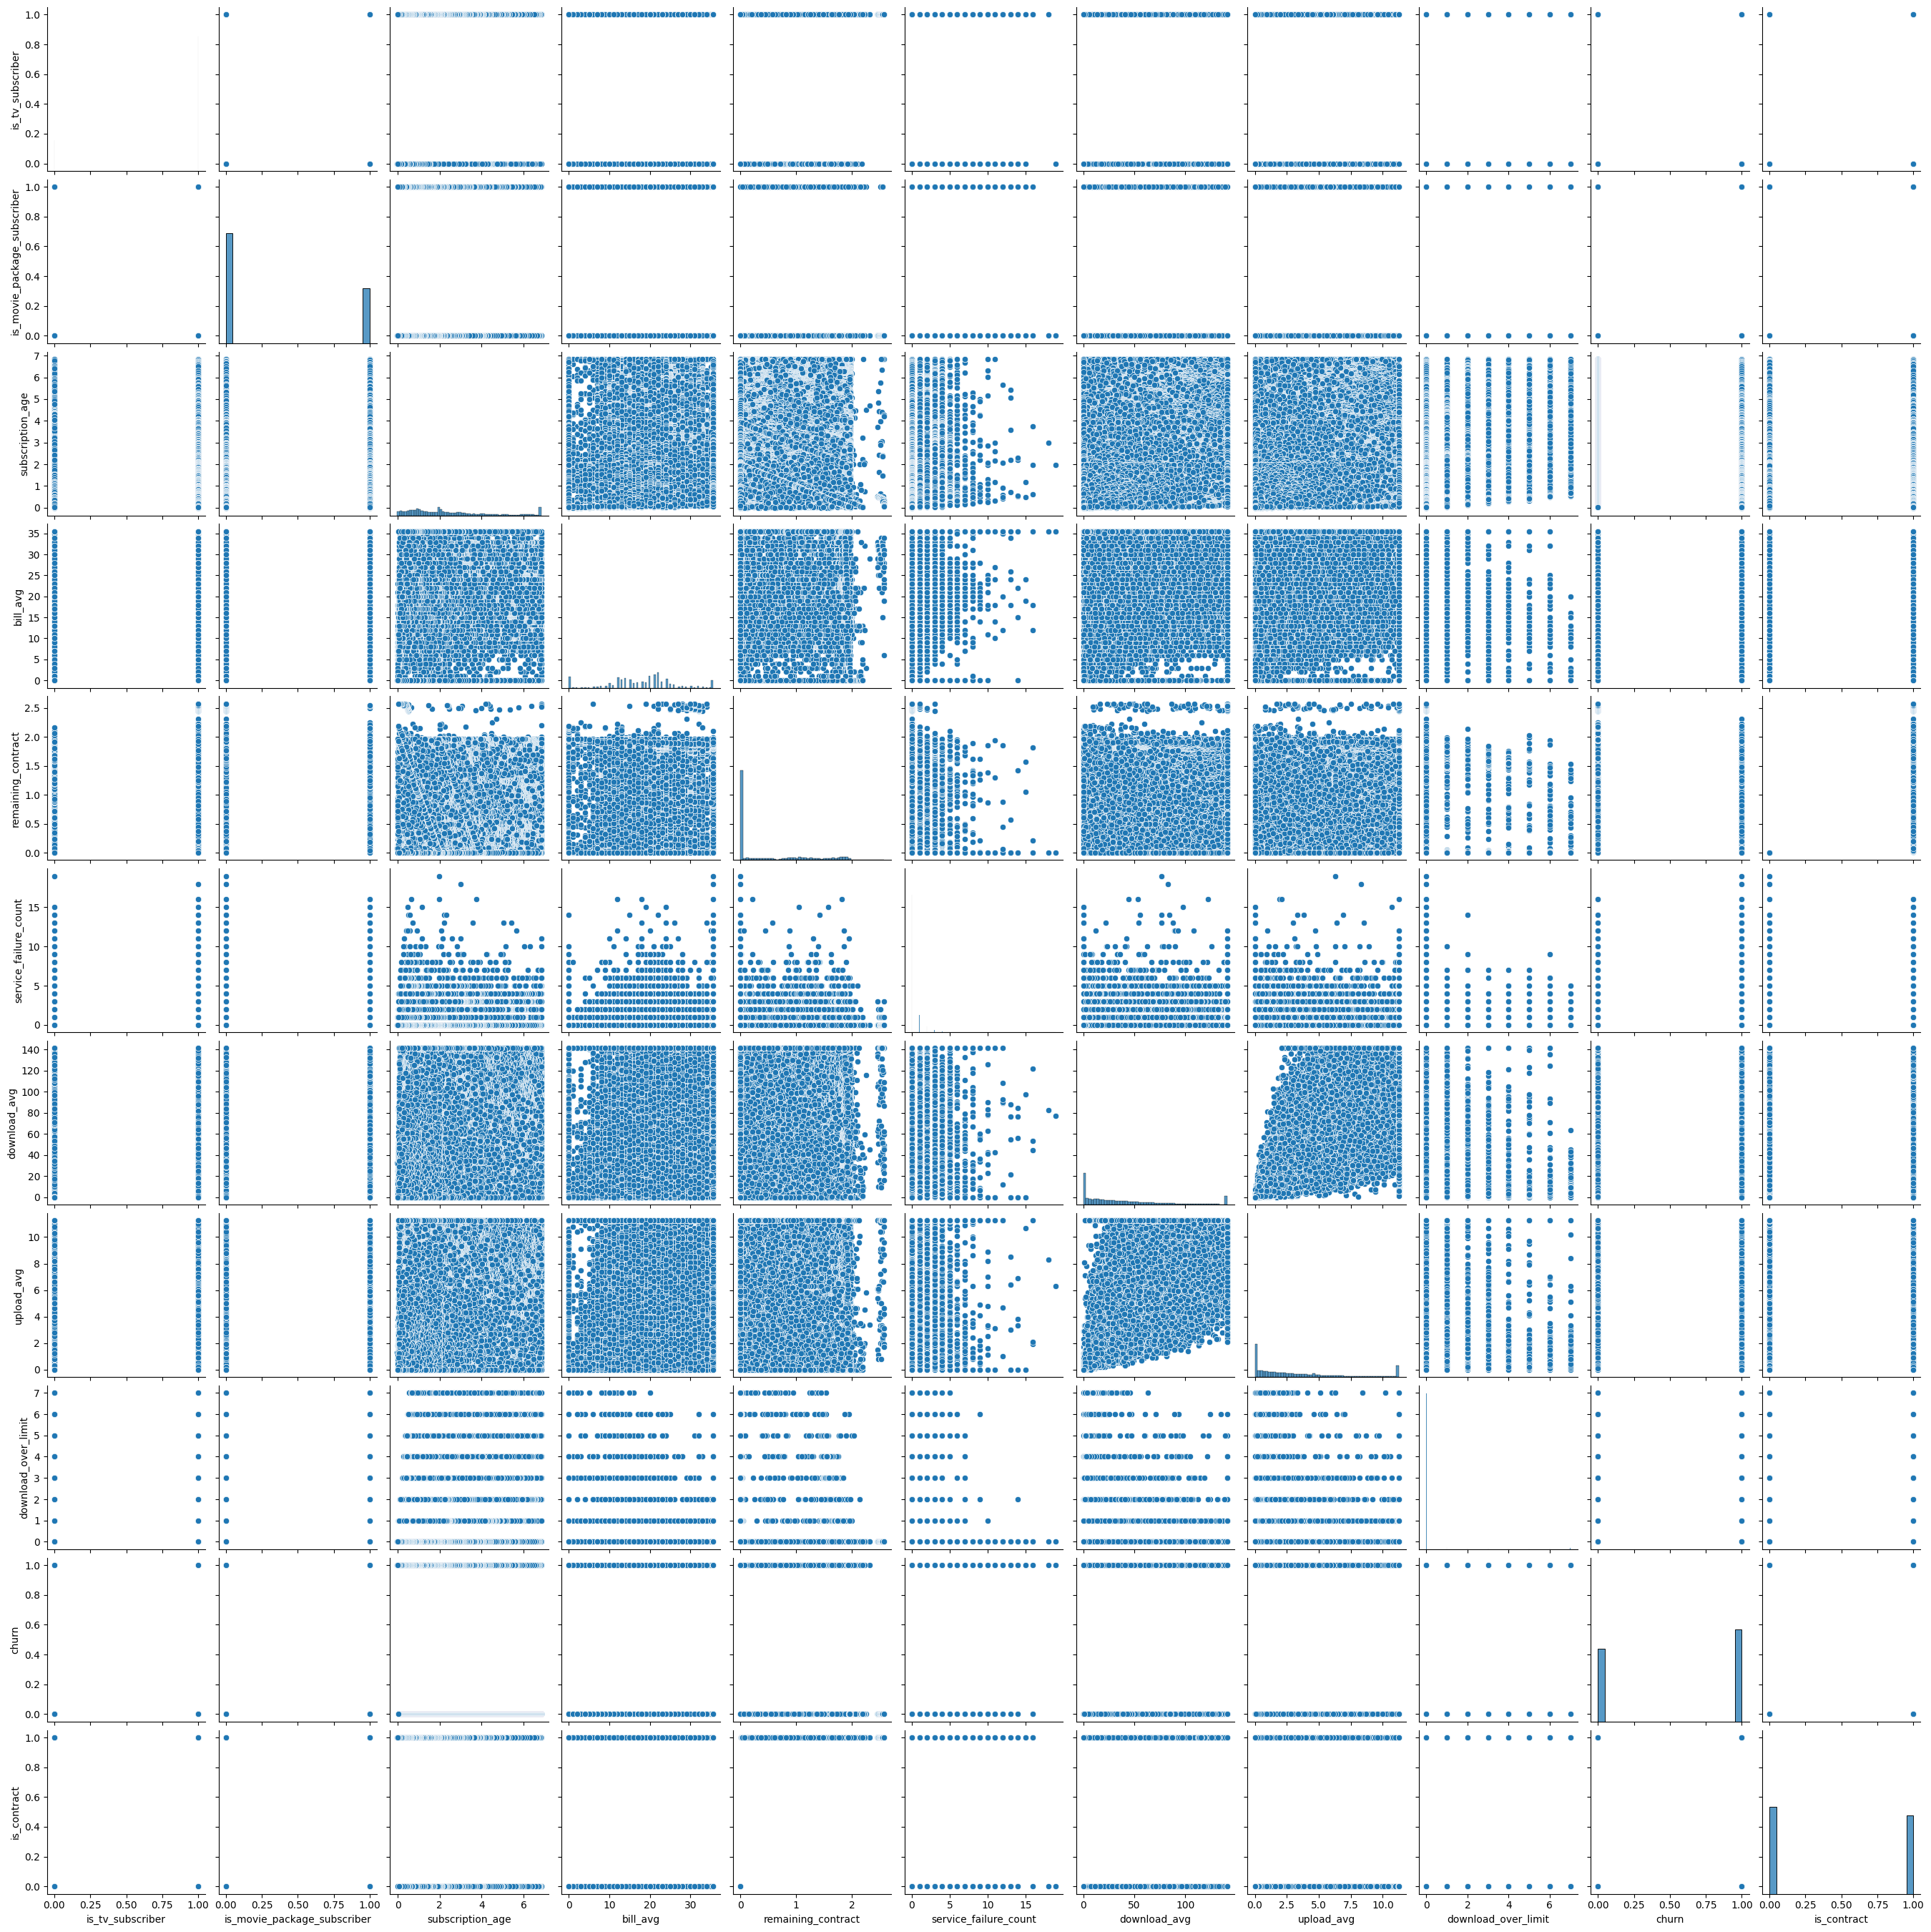

In [32]:
sns.pairplot(df_cleaned)